<a name="toc_40291_2.1"></a>
## Gradient descent summary
So far in this course, you have developed a linear model that predicts $f_{w,b}(x^{(i)})$:
$$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$
In linear regression, you utilize input training data to fit the parameters $w$,$b$ by minimizing a measure of the error between our predictions $f_{w,b}(x^{(i)})$ and the actual data $y^{(i)}$. The measure is called the $cost$, $J(w,b)$. In training you measure the cost over all of our training samples $x^{(i)},y^{(i)}$
$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2\tag{2}$$ 


In lecture, *gradient descent* was described as:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
where, parameters $w$, $b$ are updated simultaneously.  
The gradient is defined as:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$

Here *simultaniously* means that you calculate the partial derivatives for all the parameters before updating any of the parameters.

In [1]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
from lab_utils_uni import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients

In [40]:
def gradient_descent(x,y):
    m_curr = b_curr = 0
    iteration = 1200
    n = len(x)
    learning_rate = 0.08
    J_hist = []
    
    for i in range(iteration):
        y_predicted = m_curr*x+b_curr
        cost = (1/n) *sum([val**2 for val in (y-y_predicted)])
        J_hist.append(cost)
        md = -(2/n)*sum(x*(y-y_predicted))
        bd = -(2/n)*sum(y-y_predicted)
        m_curr = m_curr - learning_rate*md
        b_curr = b_curr - learning_rate*bd
        print("m {}, b {}, cost {}, i {}".format(m_curr,b_curr,cost,i))
    return m_curr,b_curr,J_hist

In [41]:
x = np.array([1,2,3,4,5])
y = np.array([5,7,9,11,13])
m,b,J_hist = gradient_descent(x,y)

m 4.96, b 1.44, cost 89.0, i 0
m 0.4991999999999983, b 0.26879999999999993, cost 71.10560000000002, i 1
m 4.451584000000002, b 1.426176000000001, cost 56.8297702400001, i 2
m 0.892231679999997, b 0.5012275199999995, cost 45.43965675929613, i 3
m 4.041314713600002, b 1.432759910400001, cost 36.35088701894832, i 4
m 1.2008760606719973, b 0.7036872622079998, cost 29.097483330142282, i 5
m 3.7095643080294423, b 1.4546767911321612, cost 23.307872849944438, i 6
m 1.4424862661541864, b 0.881337636696883, cost 18.685758762535738, i 7
m 3.4406683721083144, b 1.4879302070713722, cost 14.994867596913156, i 8
m 1.6308855378034224, b 1.0383405553279617, cost 12.046787238456794, i 9
m 3.2221235247119777, b 1.5293810083298451, cost 9.691269350698109, i 10
m 1.7770832372205707, b 1.1780607551353204, cost 7.8084968312098315, i 11
m 3.0439475772474127, b 1.5765710804477953, cost 6.302918117062937, i 12
m 1.8898457226770244, b 1.3032248704973899, cost 5.098330841763168, i 13
m 2.898169312926714, b 1.6275

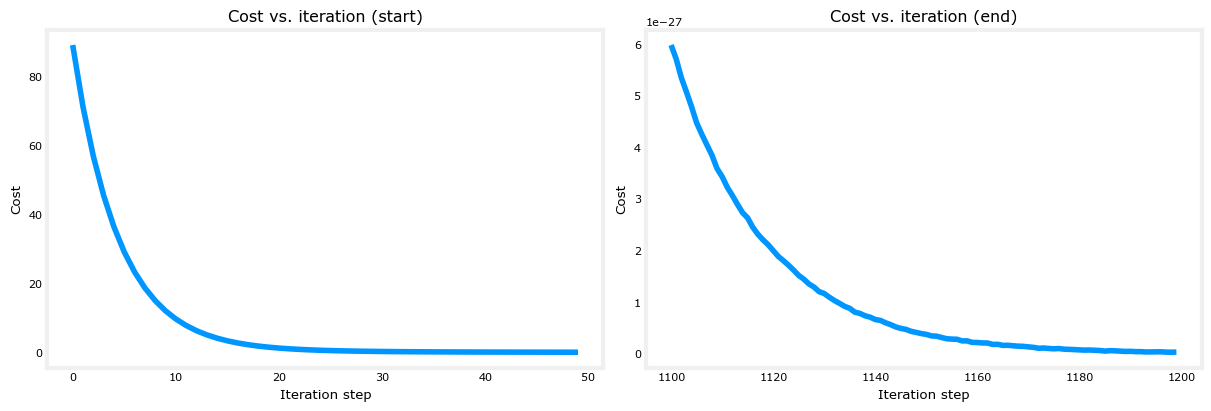

In [43]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))

# Vẽ 100 giá trị đầu tiên của cost
ax1.plot(J_hist[:50])
ax1.set_title("Cost vs. iteration (start)")
ax1.set_ylabel('Cost')
ax1.set_xlabel('Iteration step')

# Vẽ 100 giá trị cuối cùng của cost
ax2.plot(len(J_hist) - 100 + np.arange(100), J_hist[-100:])
ax2.set_title("Cost vs. iteration (end)")
ax2.set_ylabel('Cost')
ax2.set_xlabel('Iteration step')

plt.show()
